In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import csv
import math
import datetime

# import Parsivel & PluvioL data

In [4]:
# parsivel raw data processing

names = np.array(['Date', 'Time', 'Intensity of precipitation (mm/h)',
               'Precipitation since start (mm)', 'Weather code SYNOP WaWa', 'Weather code METAR/SPECI',
               'Weather code NWS', 'Radar reflectivity (dBz)', 'MOR Visibility (m)',
               'Signal amplitude of Laserband', 'Number of detected particles', 'Temperature in sensor (ºC)',
               'Heating current (A)', 'Sensor voltage (V)', 'Optics status',
               'Kinetic Energy', 'Snow intensity (mm/h)'])
names = np.append(names, ['%.0f' % x for x in np.arange(1, 1025)])
names = np.append(names, ['</SPECTRUM>'])

# add .csv to original Parsivel data file 
df_list = []
dsd_list = []

df = pd.read_csv('2021-06-08-17-32', sep=';', names=names, parse_dates=[['Date', 'Time']], index_col=['Date_Time'],
                 dayfirst=True, infer_datetime_format=True, na_values=[''], skiprows=17, encoding='latin-1')
# remove the repeating column names
# use .copy() to avoid warning of SettingWithCopy
#df = df.drop(df[df.iloc[:, 0] == df.iloc[0, 0]].index).copy()
try:
    df = df.drop(index='Date Time')
except:
    pass

# remove the last column
df = df.drop(['</SPECTRUM>'], axis=1)

# convert data type
df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S').tz_localize('Asia/Taipei')
df.loc[:, names[2]] = df.loc[:, names[2]].astype(float) # Intensity of precipitation (mm/h)

# replace <SPECTRUM> with the value of first DSD cell
df.loc[:, '1'] = df.loc[df.loc[:, '1'] != '<SPECTRUM>ZERO</SPECTRUM>', '1'].str[10:]

# fill NaN with 0
df.iloc[:,:] = df.iloc[:,:].fillna(0)
#　df.iloc[:, 13:1038] = df.iloc[:, 13:1038].astype(int)
df.loc[:, '1'] = pd.to_numeric(df.loc[:, '1'])

# DSD
dsd = df.iloc[:, 15:1039].replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
dsd = dsd.resample('1T', label='right', closed='right').sum()

# intensity
df = df.resample('1T', label='right', closed='right').mean()
pd.set_option('display.max_columns',None)

# shift 8 hours backward
df = df.shift(-8, freq='H')
dsd = dsd.shift(-8, freq='H')

df_list.append(df)
dsd_list.append(dsd)


file_names = ['2021-08-16-20-20','2021-10-23-10-46','2022-01-04-10-15','2022-07-06-11-14', '2022-10-10-02-24']

for file in file_names:
    df = pd.read_csv(file, sep=';', names=names, parse_dates=[['Date', 'Time']], index_col=['Date_Time'],
                 dayfirst=True, infer_datetime_format=True, na_values=[''], encoding='latin-1')

    # remove the repeating column names
    # use .copy() to avoid warning of SettingWithCopy
    #df = df.drop(df[df.iloc[:, 0] == df.iloc[0, 0]].index).copy()
    try:
        df = df.drop(index='Date Time')
    except:
        pass

    # remove the last column
    df = df.drop(['</SPECTRUM>'], axis=1)

    # convert data type
    df.index = pd.to_datetime(df.index, format='%d.%m.%Y %H:%M:%S').tz_localize('Asia/Taipei')
    df.loc[:, names[2]] = df.loc[:, names[2]].astype(float) # Intensity of precipitation (mm/h)

    # replace <SPECTRUM> with the value of first DSD cell
    df.loc[:, '1'] = df.loc[df.loc[:, '1'] != '<SPECTRUM>ZERO</SPECTRUM>', '1'].str[10:]

    # fill NaN with 0
    df = df.fillna(0)
    #　df.iloc[:, 13:1038] = df.iloc[:, 13:1038].astype(int)
    df.loc[:, '1'] = pd.to_numeric(df.loc[:, '1'])

    # DSD
    dsd = df.iloc[:, 15:1039].replace(r'^\s*$', np.nan, regex=True).fillna(0).astype(int)
    dsd = dsd.resample('1T', label='right', closed='right').sum().astype(int)

    # intensity
    df = df.resample('1T', label='right', closed='right').mean()
    pd.set_option('display.max_columns',None)

    # shift 8 hours backward
    df = df.shift(-8, freq='H')
    dsd = dsd.shift(-8, freq='H')

    df_list.append(df)
    dsd_list.append(dsd)

combined_df = pd.concat(df_list).fillna(0)
combined_dsd = pd.concat(dsd_list).fillna(0).astype(int)

/tmp/ipykernel_3166795/423503565.py:16: DtypeWarning: Columns (2,3,4,7,8,9,10,11,12,13,14,15,16,1041) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2021-06-08-17-32', sep=';', names=names, parse_dates=[['Date', 'Time']], index_col=['Date_Time'],
/tmp/ipykernel_3166795/423503565.py:31: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, names[2]] = df.loc[:, names[2]].astype(float) # Intensity of precipitation (mm/h)
/tmp/ipykernel_3166795/423503565.py:39: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, 

In [3]:
combined_dsd

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1

In [5]:
df_2021 = combined_df['2021-06-30 16:00:00+08:00':'2021-10-30 16:00:00+08:00']
dsd_2021 = combined_dsd['2021-06-30 16:00:00+08:00':'2021-10-30 16:00:00+08:00']

df_2022 = combined_df['2022-06-30 16:00:00+08:00':'2022-10-30 16:00:00+08:00']
dsd_2022 = combined_dsd['2022-06-30 16:00:00+08:00':'2022-10-30 16:00:00+08:00']

dsd_2021

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1

In [6]:
# add pluvioL data
pluvio2021 = pd.read_csv('Pluvio2021.csv', skiprows=3)
pluvio2021["_value"] = pd.to_numeric(pluvio2021["_value"], errors='coerce')
pluvio2021["_time"] = pd.to_datetime(pluvio2021["_time"], format='%Y-%m-%d'+'T'+'%H:%M:%S'+'Z', errors='coerce')
pluvio2021 = pluvio2021.set_index("_time").tz_localize('Asia/Taipei').resample('1T', label='right', closed='right').mean()

pluvio2022 = pd.read_csv('Pluvio2022.csv', skiprows=3)
pluvio2022["_value"] = pd.to_numeric(pluvio2022["_value"], errors='coerce')
pluvio2022["_time"] = pd.to_datetime(pluvio2022["_time"], format='%Y-%m-%d'+'T'+'%H:%M:%S'+'Z', errors='coerce')
pluvio2022 = pluvio2022.set_index("_time").tz_localize('Asia/Taipei').resample('1T', label='right', closed='right').mean()

pluvio2021 = pluvio2021['2021-06-30 16:00:00+08:00':'2021-10-30 16:00:00+08:00']
pluvio2022 = pluvio2022['2022-06-30 16:00:00+08:00':'2022-10-30 16:00:00+08:00']

/tmp/ipykernel_3166795/3877731192.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pluvio2021 = pluvio2021.set_index("_time").tz_localize('Asia/Taipei').resample('1T', label='right', closed='right').mean()
/tmp/ipykernel_3166795/3877731192.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pluvio2022 = pluvio2022.set_index("_time").tz_localize('Asia/Taipei').resample('1T', label='right', closed='right').mean()


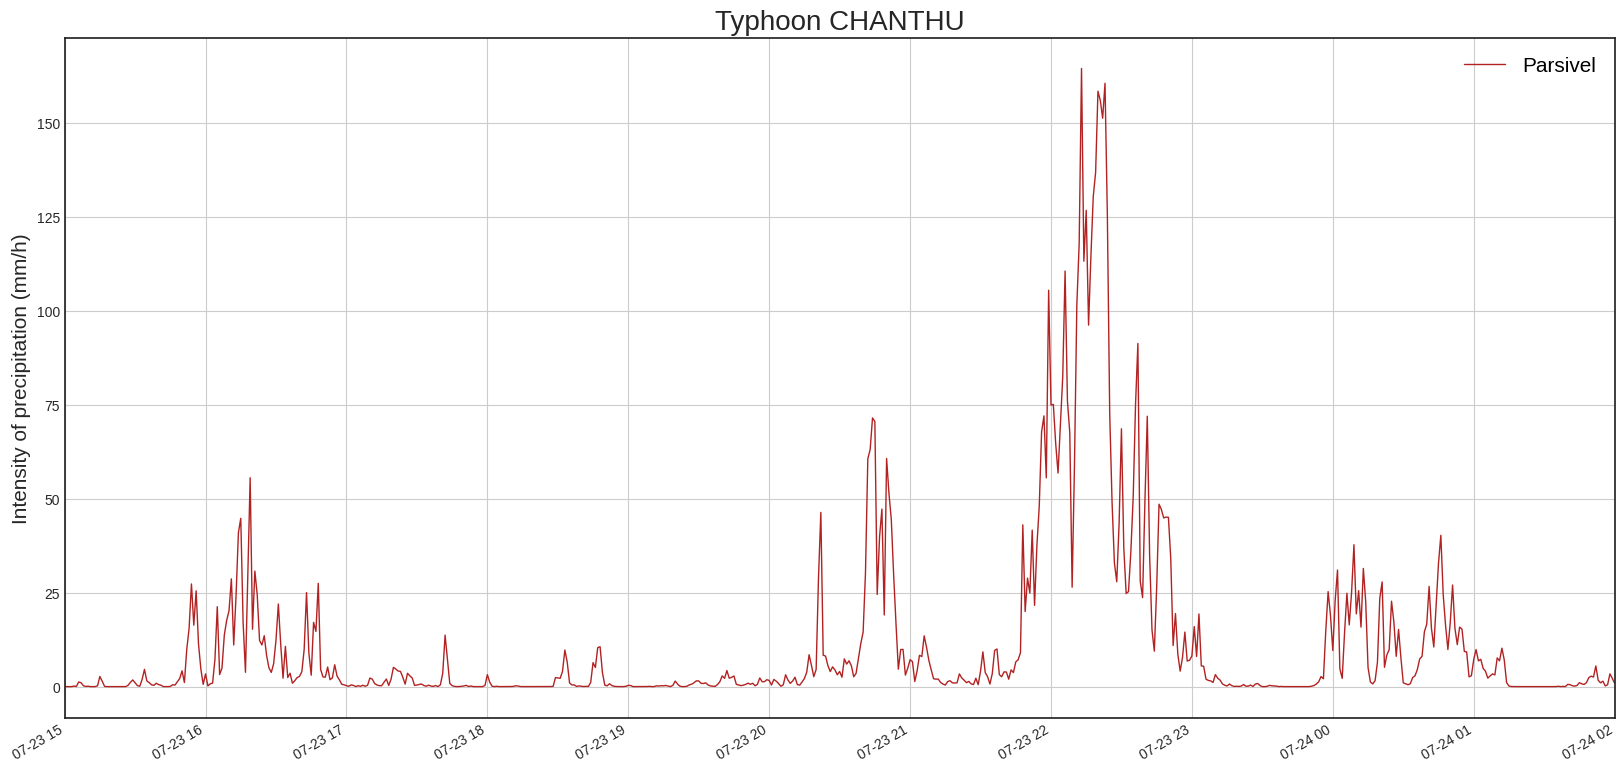

In [64]:
# plot intensity
plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(20,10))

parsivel_intensity = df_2021["Intensity of precipitation (mm/h)"]
pluvioL_intensity = pluvio2021["_value"]
Parsivel_intensity = plt.plot(parsivel_intensity, linewidth = 1, label="Parsivel", color = 'firebrick')
#PluvioL_intensity = plt.plot(pluvioL_intensity, linewidth = 1, label="PluvioL", color = 'darkturquoise')

plt.gcf().autofmt_xdate()
plt.title("Typhoon CHANTHU", fontsize = 20)
plt.ylabel("Intensity of precipitation (mm/h)", fontsize = 15)
plt.legend(labelcolor="black", fontsize = 15)
plt.grid(True)
plt.xlim([datetime.datetime(2021, 7, 23, 7, 0, 0), 
           datetime.datetime(2021, 7, 23, 18, 0, 0)])
#plt.ylim(0, 40)

plt.show()

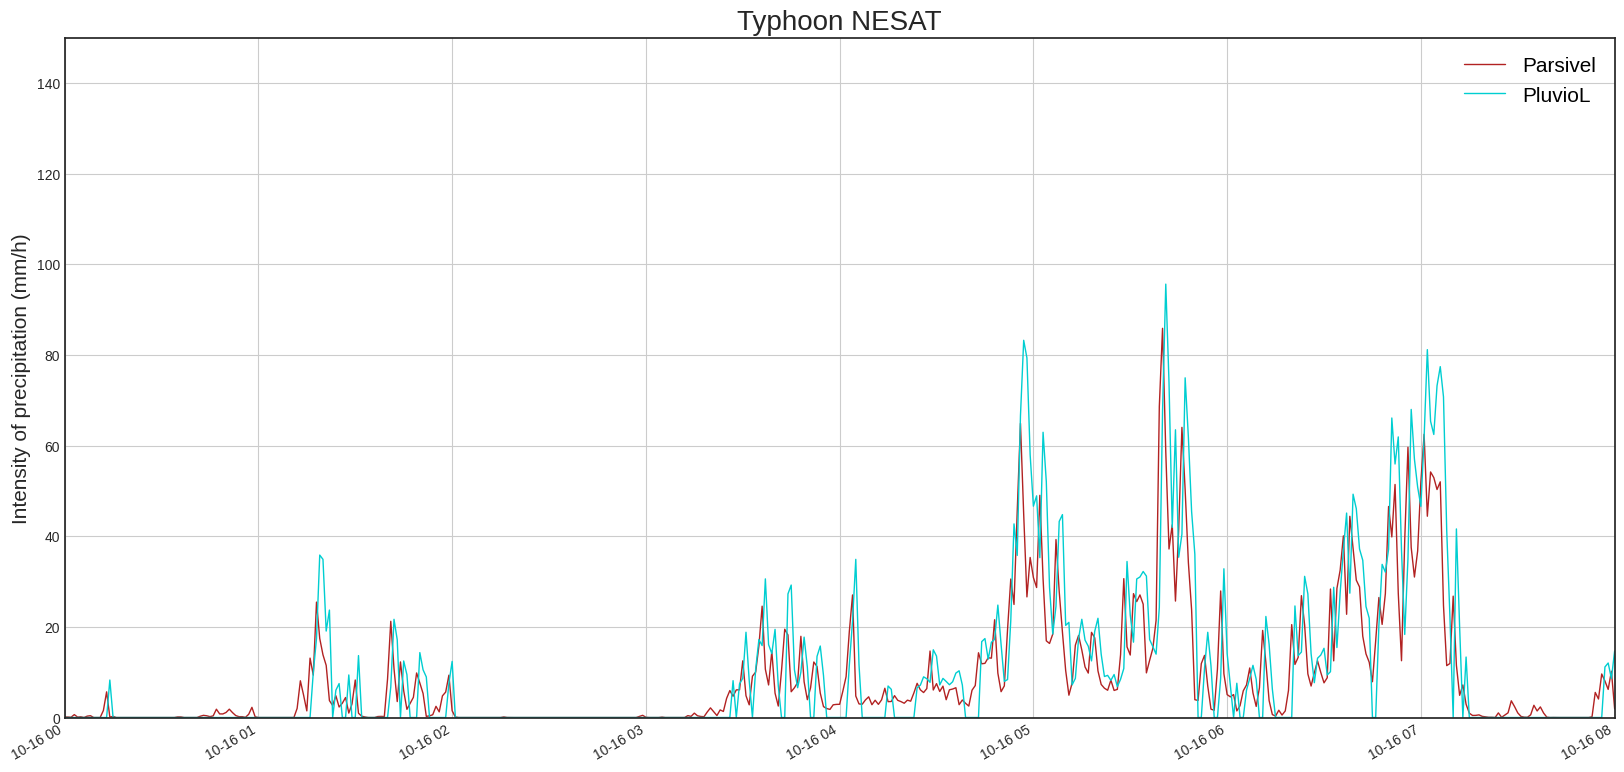

In [7]:
# plot intensity
plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(20,10))

parsivel_intensity = df_2022["Intensity of precipitation (mm/h)"]
pluvioL_intensity = pluvio2022["_value"]
Parsivel_intensity = plt.plot(parsivel_intensity, linewidth = 1, label="Parsivel", color = 'firebrick')
PluvioL_intensity = plt.plot(pluvioL_intensity, linewidth = 1, label="PluvioL", color = 'darkturquoise')

plt.gcf().autofmt_xdate()
plt.title("Typhoon NESAT", fontsize = 20)
plt.ylabel("Intensity of precipitation (mm/h)", fontsize = 15)
plt.legend(labelcolor="black", fontsize = 15)
plt.grid(True)
plt.xlim([datetime.datetime(2022, 10, 15, 16, 0, 0), 
           datetime.datetime(2022, 10, 16, 0, 0, 0)])
plt.ylim(0, 150)

plt.show()

In [8]:
df_diff2021 = pd.DataFrame(columns = ['diff','diff%'])
df_diff2021['diff'] = df_2021["Intensity of precipitation (mm/h)"] - pluvio2021["_value"]
df_diff2021['diff%'] = df_diff2021['diff'] / pluvio2021["_value"]

print(df_diff2021['diff'].max())
print(df_diff2021['diff'].min())
print(df_diff2021['diff'].mean())
print(df_diff2021['diff'].std())
print(df_diff2021['diff'].median())

print(df_diff2021['diff%'].max())
print(df_diff2021['diff%'].min())
print(df_diff2021['diff%'].mean())
print(df_diff2021['diff%'].std())
print(df_diff2021['diff%'].median())

95.34449999999998
-53.385666666666665
0.09856725430443074
1.9015651125921778
0.0
inf
-1.0
inf
nan
inf


<Axes: ylabel='diff'>

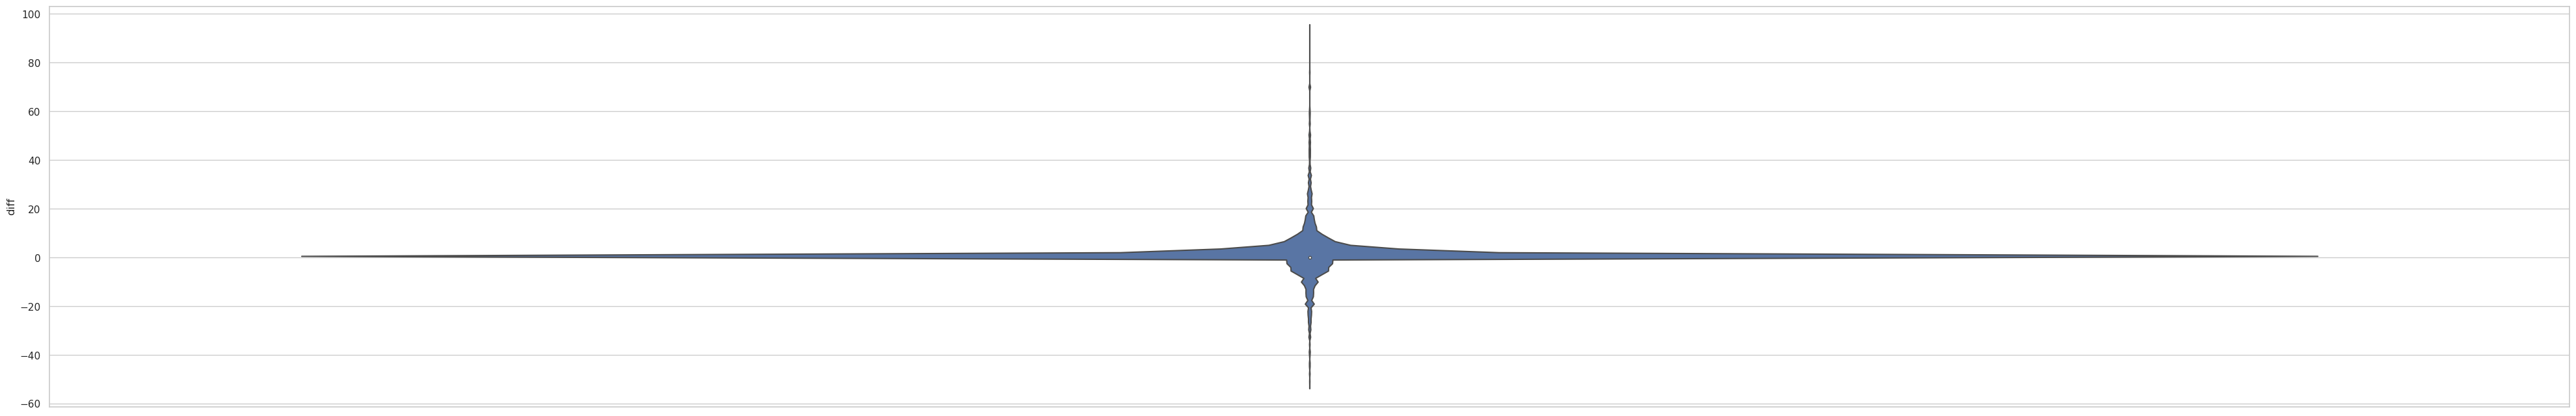

In [27]:
# violinplot
sns.set(rc={"figure.figsize": (50, 8)})
sns.set_style("whitegrid")
sns.violinplot(y=df_diff2021['diff'])

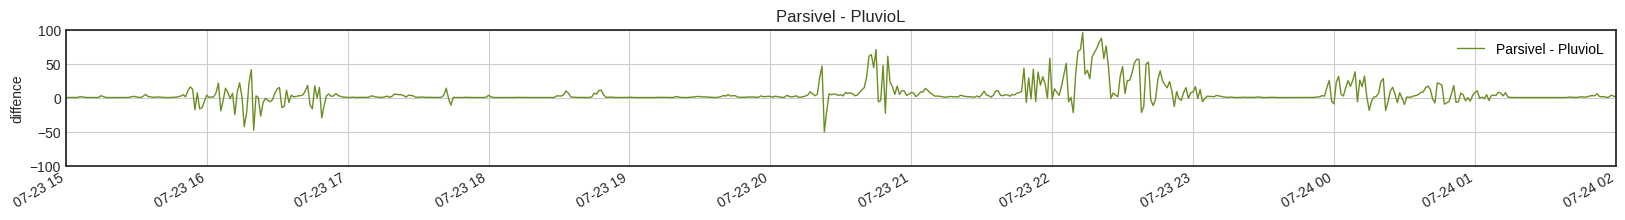

In [19]:
plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(20,2))

plt.plot(df_diff2021['diff'], linewidth = 1, label="Parsivel - PluvioL", color = 'olivedrab')

plt.gcf().autofmt_xdate()
plt.title("Parsivel - PluvioL")
plt.ylabel("diffence")
plt.legend(labelcolor="black")
plt.grid(True)
plt.xlim([datetime.datetime(2021, 7, 23, 7, 0, 0), 
           datetime.datetime(2021, 7, 23, 18, 0, 0)])
plt.ylim(-100, 100)

plt.show()

In [20]:
df_diff2022 = pd.DataFrame(columns = ['diff'])
df_diff2022['diff'] = df_2022["Intensity of precipitation (mm/h)"] - pluvio2022["_value"]
df_diff2022
print(df_diff2022['diff'].max())
print(df_diff2022['diff'].min())
print(df_diff2022['diff'].mean())
print(df_diff2022['diff'].std())
print(df_diff2022['diff'].median())

54.43816666666667
-172.82800000000003
0.033196400607174756
1.9054240879110522
0.0


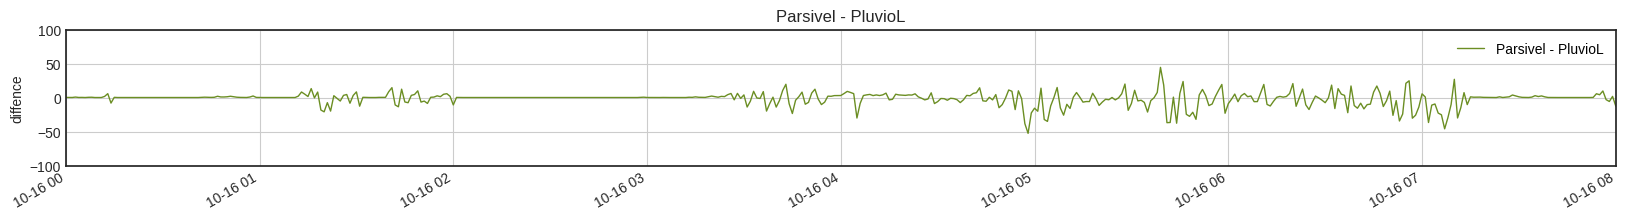

In [16]:
plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(20,2))

plt.plot(df_diff2022['diff'], linewidth = 1, label="Parsivel - PluvioL", color = 'olivedrab')

plt.gcf().autofmt_xdate()
plt.title("Parsivel - PluvioL")
plt.ylabel("diffence")
plt.legend(labelcolor="black")
plt.grid(True)
plt.xlim([datetime.datetime(2022, 10, 15, 16, 0, 0), 
           datetime.datetime(2022, 10, 16, 0, 0, 0)])
plt.ylim(-100, 100)

plt.show()

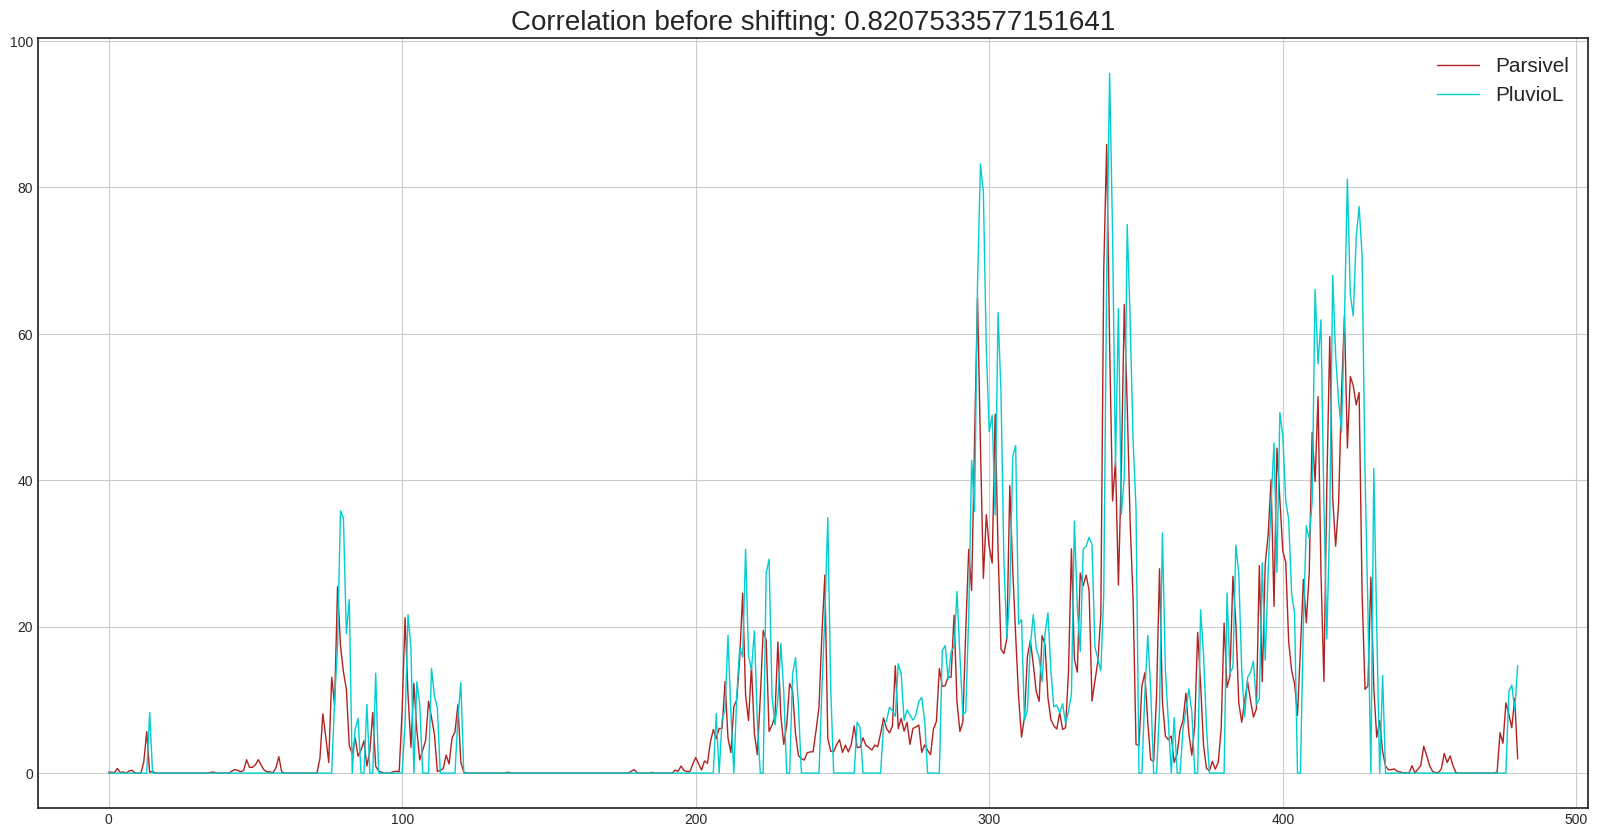

In [9]:
# cross correlation
parsivel_intensity_cor = parsivel_intensity['2022-10-16 00:00:00+08:00':'2022-10-16 08:00:00+08:00'].reset_index(drop=True)
pluvioL_intensity_cor = pluvioL_intensity['2022-10-16 00:00:00+08:00':'2022-10-16 08:00:00+08:00'].reset_index(drop=True)#.iloc[10:]

# Function to calculate correlation
def correlation(x, y):
    shortest = min(x.shape[0], y.shape[0])
    return np.corrcoef(x.iloc[:shortest].values, y.iloc[:shortest].values)[0, 1]

# Function to plot time series and show the correlation
def plot_correlation(x, y, text):
    # plot 
    plt.subplots(figsize=(20, 10))
    plt.plot(x, label="Parsivel", linewidth = 1, color = 'firebrick')
    plt.plot(y, label="PluvioL", linewidth = 1, color = 'darkturquoise')
    plt.title(f"Correlation {text}: {correlation(x, y)}", fontsize = 20)
    plt.grid(True)
    plt.legend(loc="best", fontsize = 15)
    plt.show()

# Show results without shifting
plot_correlation(parsivel_intensity_cor, pluvioL_intensity_cor, "before shifting")

In [13]:
print(parsivel_intensity.size)
print(pluvioL_intensity.size)

167808
175680


Best lag: -1


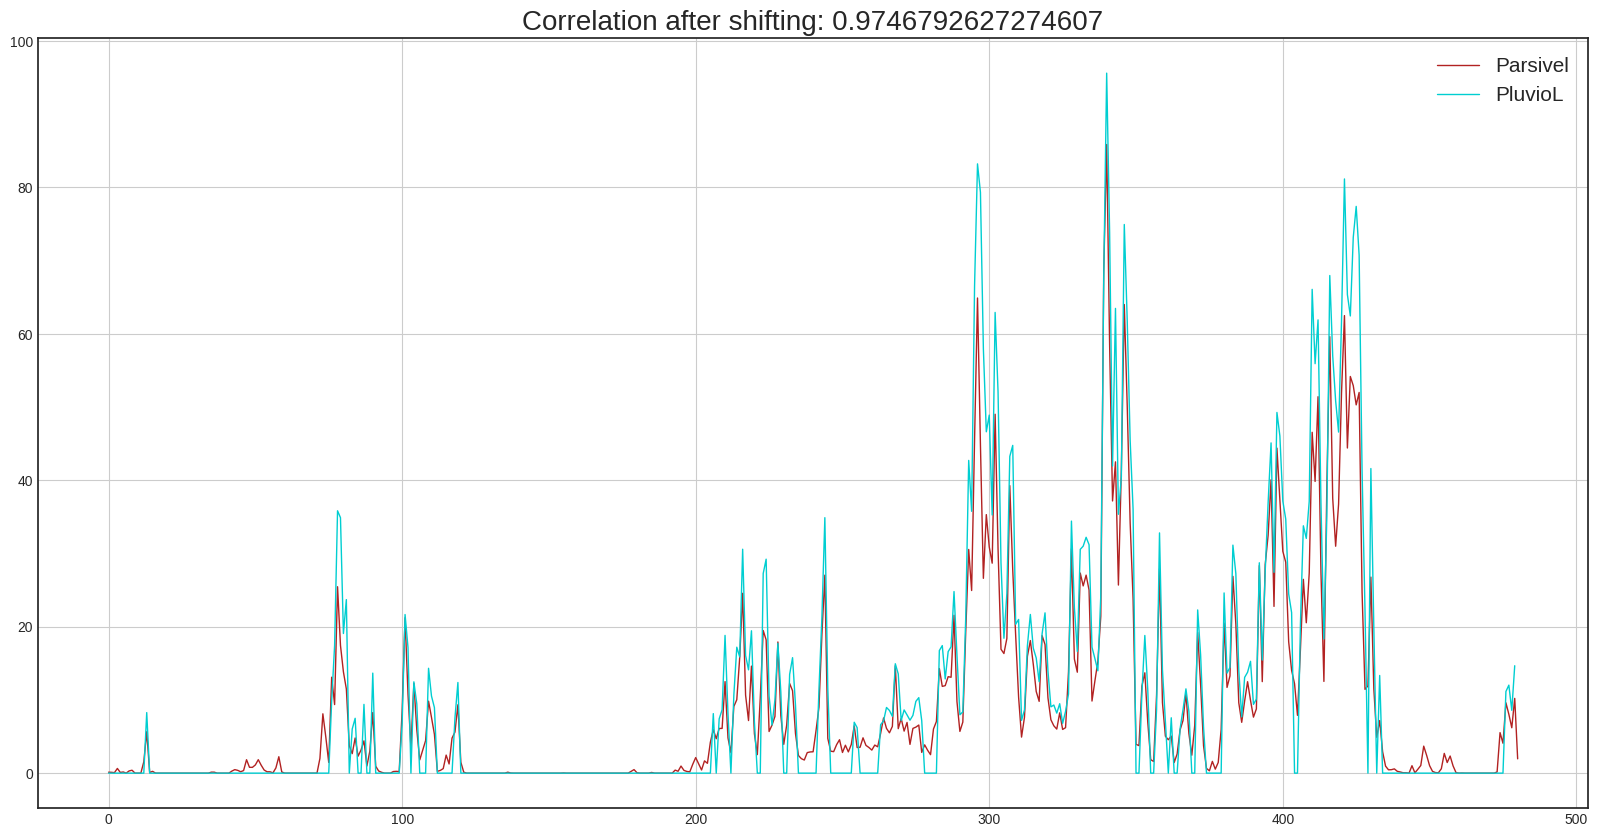

In [11]:
from scipy.signal import correlate
from scipy.signal import correlation_lags

# Function to calculate cross-correlation,
# extract the best matching shift and then shift
# one of the series appropriately.
def shift_for_maximum_correlation(x, y):
    correlation = correlate(x, y, mode="full")
    lags = correlation_lags(x.size, y.size, mode="full")
    lag = lags[np.argmax(correlation)]
    print(f"Best lag: {lag}")
    if lag < 0:
        y = y.iloc[abs(lag):].reset_index(drop=True)
    else:
        x = x.iloc[lag:].reset_index(drop=True)
    return x, y

# Plot results after shifting
shifted_parsivel, shifted_pluvioL = shift_for_maximum_correlation(parsivel_intensity_cor, pluvioL_intensity_cor)
plot_correlation(shifted_parsivel, shifted_pluvioL, text="after shifting")

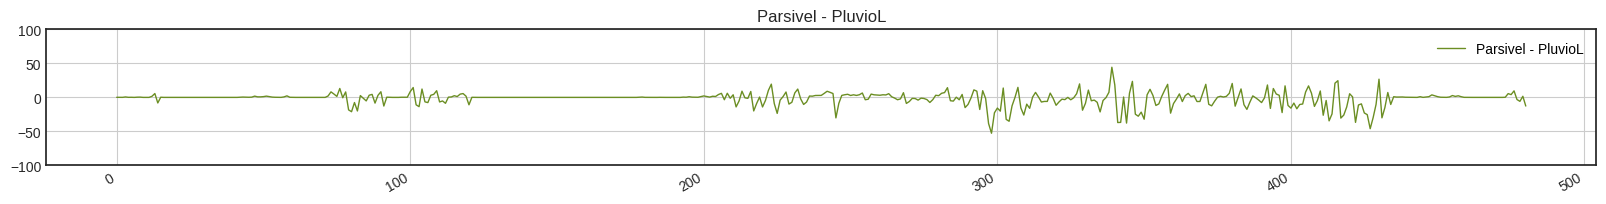

In [12]:
# plot difference of parsivel and pluvioL

plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(20,2))

diff = parsivel_intensity_cor - pluvioL_intensity_cor
difference = plt.plot(diff, linewidth = 1, label="Parsivel - PluvioL", color = 'olivedrab')

plt.gcf().autofmt_xdate()
plt.title("Parsivel - PluvioL")
#plt.ylabel("Intensity of precipitation (mm/h)")
plt.legend(labelcolor="black")
plt.grid(True)
plt.ylim(-100, 100)

plt.show()

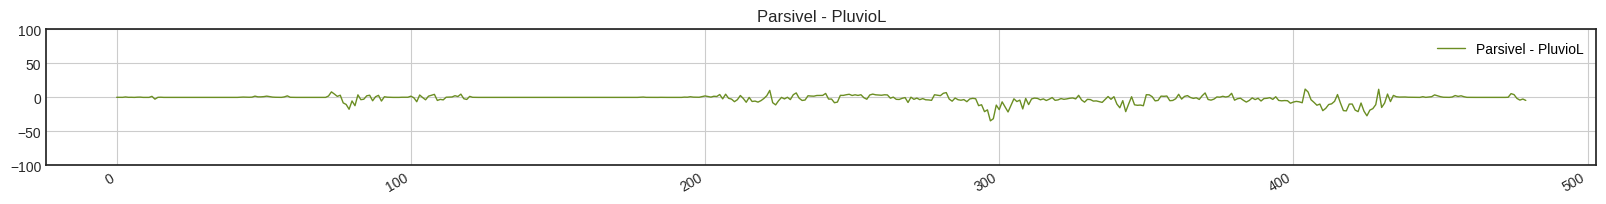

In [13]:
# plot difference of parsivel and pluvioL

plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(20,2))

diff = shifted_parsivel - shifted_pluvioL
difference = plt.plot(diff, linewidth = 1, label="Parsivel - PluvioL", color = 'olivedrab')

plt.gcf().autofmt_xdate()
plt.title("Parsivel - PluvioL")
#plt.ylabel("Intensity of precipitation (mm/h)")
plt.legend(labelcolor="black")
plt.grid(True)
plt.ylim(-100, 100)

plt.show()

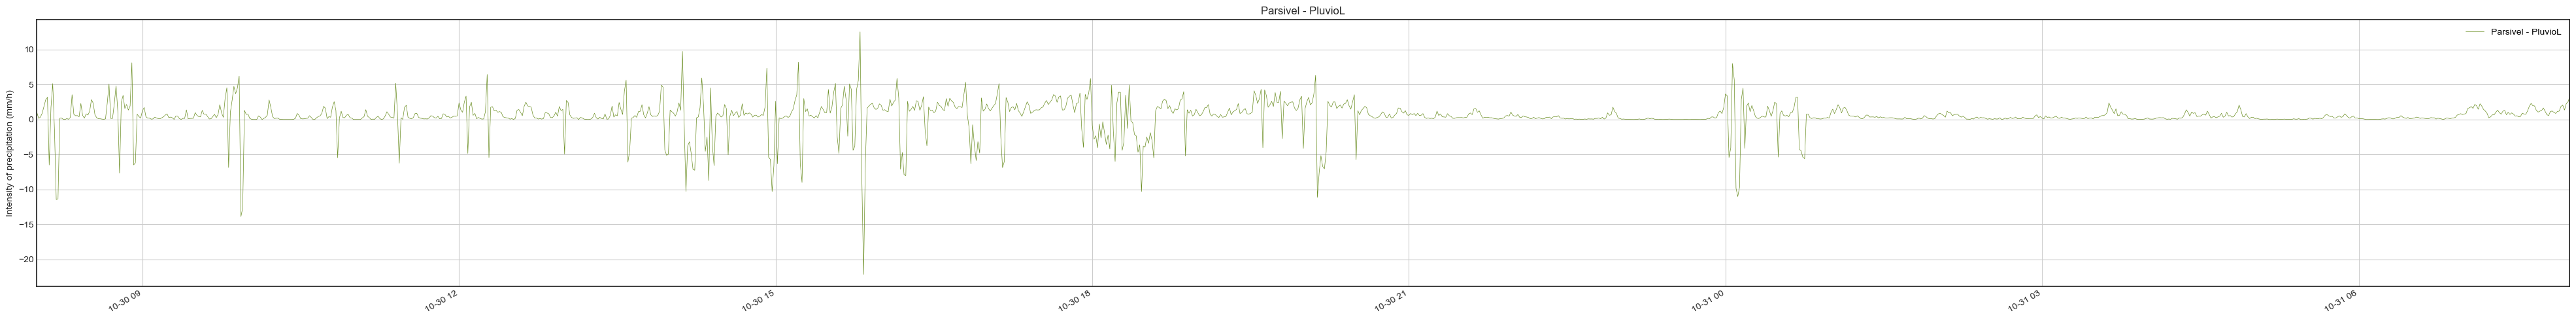

In [ ]:
# plot difference of parsivel and pluvioL

plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(50,6))

diff = parsivel_intensity - pluvioL_intensity
difference = plt.plot(diff, linewidth = 0.5, label="Parsivel - PluvioL", color = 'olivedrab')

plt.gcf().autofmt_xdate()
plt.title("Parsivel - PluvioL")
plt.ylabel("Intensity of precipitation (mm/h)")
plt.legend(labelcolor="black")
plt.grid(True)
plt.xlim([datetime.datetime(2022, 10, 30, 0, 0, 0), 
           datetime.datetime(2022, 10, 31, 0, 0,0)])

plt.show()

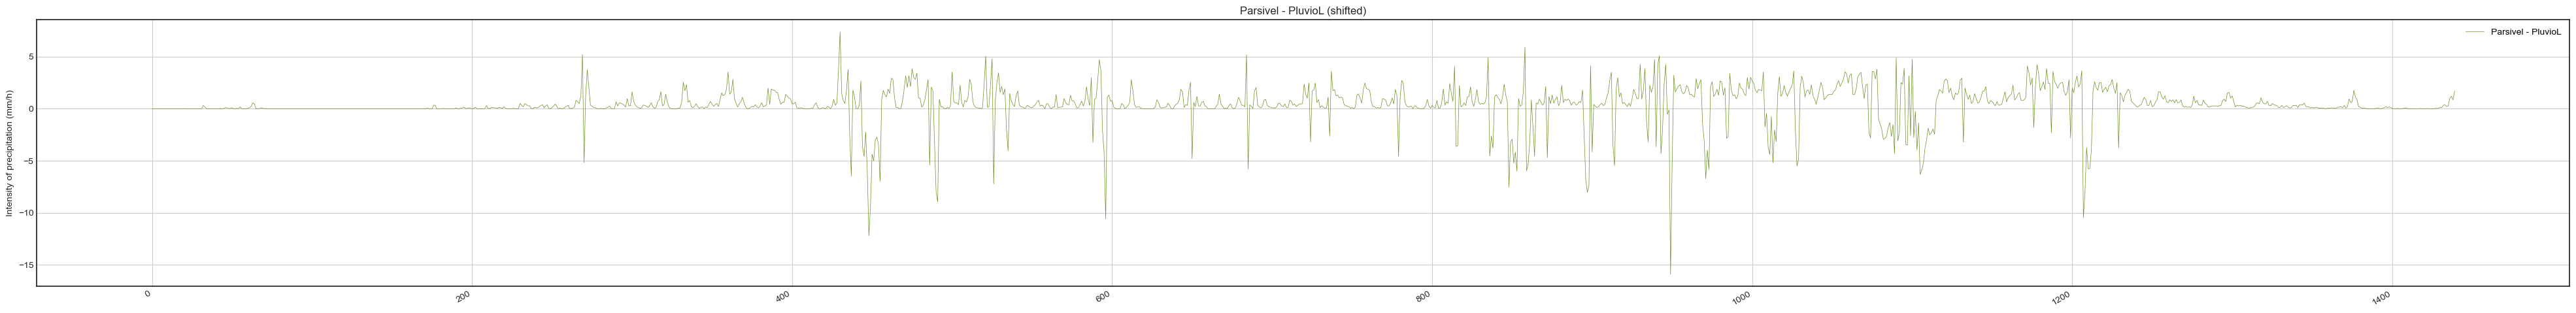

In [ ]:
# plot difference of parsivel and pluvioL (shifted)

plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(50,6))

diff = shifted_parsivel - shifted_pluvioL
difference = plt.plot(diff, linewidth = 0.5, label="Parsivel - PluvioL", color = 'olivedrab')

plt.gcf().autofmt_xdate()
plt.title("Parsivel - PluvioL (shifted)")
plt.ylabel("Intensity of precipitation (mm/h)")
plt.legend(labelcolor="black")
plt.grid(True)
plt.xlim()

plt.show()

# RMSE per min of Parsivel DSD data

In [14]:
# extract data from certain time period
start_time = "2022-10-29 16:00:00+08:00"
# start_time = "2022-10-30 15:00:00"
end_time = "2022-10-30 16:00:00+08:00"
# end_time = "2022-10-30 16:00:00"
# filt = (data["Date_Time"] >= start_time) & (data["Date_Time"] <= end_time)
# data = data.loc[filt]

dsd = dsd_2022['2022-10-16 00:00:00+08:00':'2022-10-16 08:00:00+08:00']


df_rmse = pd.DataFrame(columns=['rmse'])

# particle speed and diameter class
speed_class = np.array([0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95,1.1,1.3,1.5,1.7,1.9,
        2.2,2.6,3.0,3.4,3.8,4.4,5.2,6.0,6.8,7.6,8.8,10.4,12.0,13.6,15.2,17.6,20.8])
diameter_class = np.array([0.062,0.187,0.312,0.437,0.562,0.687,0.812,0.937,1.062,1.187,1.375,1.625,1.875,2.125,2.375,
                    2.750,3.250,3.750,4.250,4.750,5.500,6.500,7.500,8.500,9.500,11.000,13.000,15.000,17.000,19.000,21.500,24.500])

# theoratical speed
theo_speed = 9.65 - 10.43 * np.exp(-0.6 * diameter_class[:])

# create error matrix & theoratical speed matrix
error_mat = np.zeros([32, 32], float)
theo_speed_mat = np.zeros([32, 32], float)

for i in range(31):
    theo_speed_mat[i][:] = theo_speed

for i in range(31):
    error_mat[i][:] = speed_class[31-i]

error_mat = np.square(np.subtract(error_mat, theo_speed_mat))

# write time series rmse into dataframe
for index, row in dsd.iterrows():
    # tranfrom data into 32x32 matrix
    array = np.array(dsd.loc[index].astype(int))
    
    if array.sum() == 0:
        df_rmse.loc[index, ['rmse']] = 0
        continue
    # sum
    # array = np.sum(array, axis=0)
    # array = np.asarray(np.sum(array, axis=0), dtype=float)

    mat = np.flip(array.reshape(32, 32), 0)
    rmse = np.sqrt(np.divide(np.multiply(error_mat, mat).sum(), mat.sum()))
    df_rmse.loc[index, ['rmse']] = rmse

df_rmse

,rmse
2022-10-16 00:00:00+08:00,1.065563
2022-10-16 00:01:00+08:00,1.038945
2022-10-16 00:02:00+08:00,0.982604
2022-10-16 00:03:00+08:00,1.21638
2022-10-16 00:04:00+08:00,0.989934
...,...
2022-10-16 07:56:00+08:00,1.702348
2022-10-16 07:57:00+08:00,1.217122
2022-10-16 07:58:00+08:00,1.817743
2022-10-16 07:59:00+08:00,1.526541


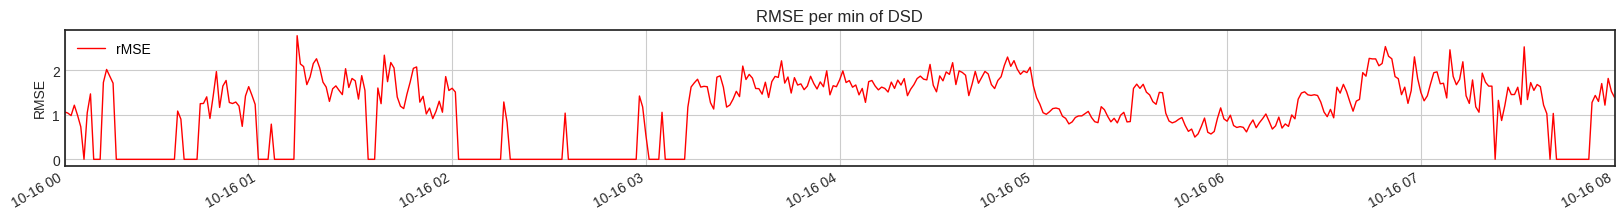

In [16]:
# plot difference of parsivel and pluvioL

plt.style.use("seaborn-v0_8-white")
plt.figure(figsize=(20,2))

rmse_curve = plt.plot(df_rmse['rmse'], linewidth = 1, label = "rMSE", color = 'red')

plt.gcf().autofmt_xdate()
plt.ylabel("RMSE")
plt.title("RMSE per min of DSD")
plt.legend(labelcolor="black")
plt.grid(True)
plt.xlim([datetime.datetime(2022, 10, 15, 16, 0, 0), 
           datetime.datetime(2022, 10, 16, 0, 0, 0)])

plt.show()

In [50]:
# plot every drop
drop = pd.DataFrame()

# 循环遍历矩阵的每个元素
for i in range(32):
    for j in range(32):
        # 获取矩阵元素的值
        value = mat[i][j].astype(int)

        # 根据值重复构建直径和速度的数据列表
        diameter_list = [diameter_class[j]] * value
        speed_list = [speed_class[31-i]] * value

        # 将直径和速度的数据列表添加到DataFrame
        temp_drop = pd.DataFrame({'diameter': diameter_list, 'velocity': speed_list})

        # 将临时DataFrame添加到主DataFrame
        drop = pd.concat([drop, temp_drop], ignore_index=True)

# 打印输出DataFrame
print(drop)

     diameter  velocity
0       0.937      5.20
1       1.062      5.20
2       1.187      5.20
3       1.187      5.20
4       1.375      5.20
..        ...       ...
901     0.437      0.75
902     0.437      0.75
903     0.562      0.75
904     0.687      0.75
905     0.562      0.25

[906 rows x 2 columns]


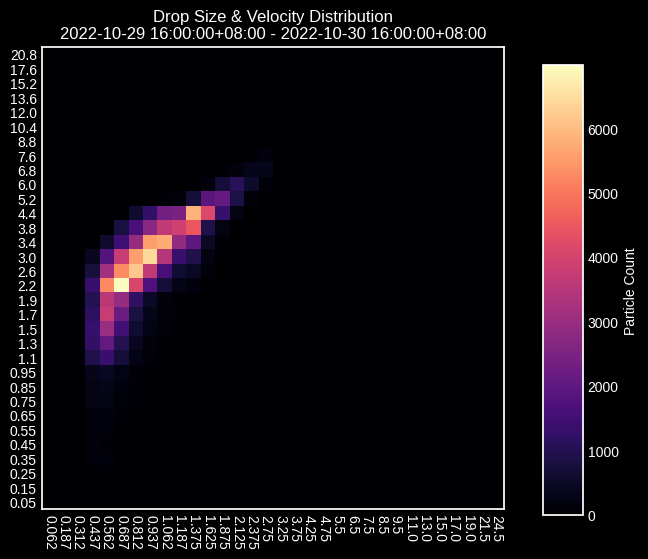

/tmp/ipykernel_3081155/3456215642.py:30: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(mat_sum), cmap="magma", interpolation="none")


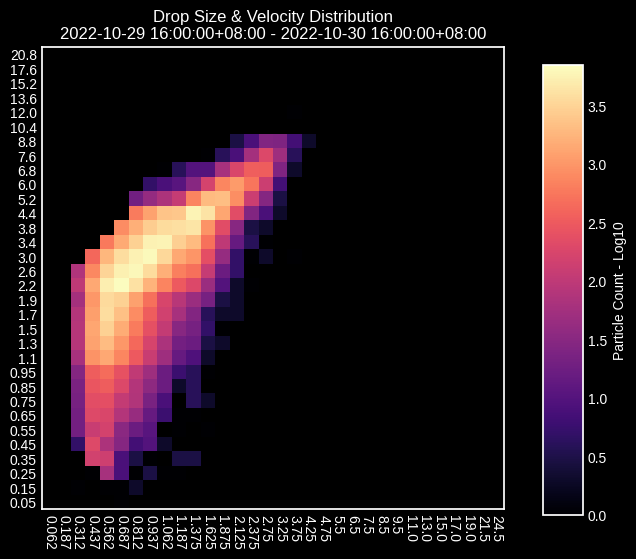

In [48]:
# visualize parsivel data

wt_mat = np.zeros([32, 1], float)
for i in range(0, 32):
    for j in range(0, 32):
        wt_mat[i] += mat[j][i] * speed_class[31 - j]
    if wt_mat[i] != 0.0:
        wt_mat[i] /= np.sum(mat, axis=0)[i]

array = np.array(dsd.iloc[:, 0:1024].astype(int))
array = np.sum(array, axis=0)
mat_sum = np.flip(array.reshape(32, 32), 0)

# mat = mat.astype(float)
plt.style.use("dark_background")
plt.figure(figsize=(8, 6))
plt.imshow(mat_sum, cmap="magma", interpolation="none")
title = "Drop Size & Velocity Distribution" + "\n" + start_time + " - " + end_time
plt.title(title)
plt.xticks(np.arange(0, 32, 1), np.array(diameter_class), rotation=270)
plt.yticks(np.arange(0, 32, 1), np.flipud(np.array(speed_class)))
plt.grid(False)
cax = plt.axes([0.85, 0.1, 0.05, 0.75])
plt.colorbar(cax=cax)
plt.ylabel("Particle Count")
plt.show()

# mat[mat <= 0] = 1
plt.figure(figsize=(8, 6))
plt.imshow(np.log10(mat_sum), cmap="magma", interpolation="none")
plt.title(title)
plt.xticks(np.arange(0, 32, 1), np.array(diameter_class), rotation=270)
plt.yticks(np.arange(0, 32, 1), np.flipud(np.array(speed_class)))
plt.grid(False)
cax = plt.axes([0.85, 0.1, 0.05, 0.75])
plt.colorbar(cax=cax)
plt.ylabel("Particle Count - Log10")
plt.show()

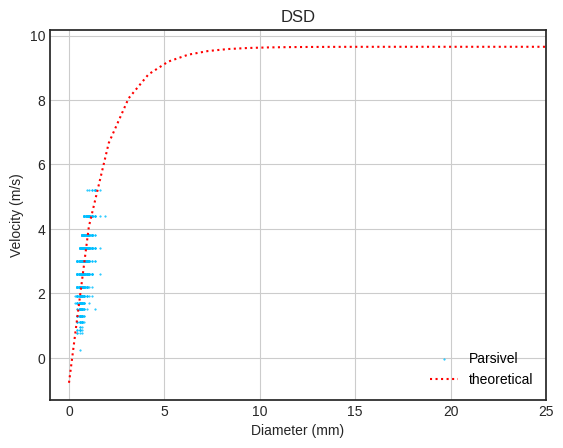

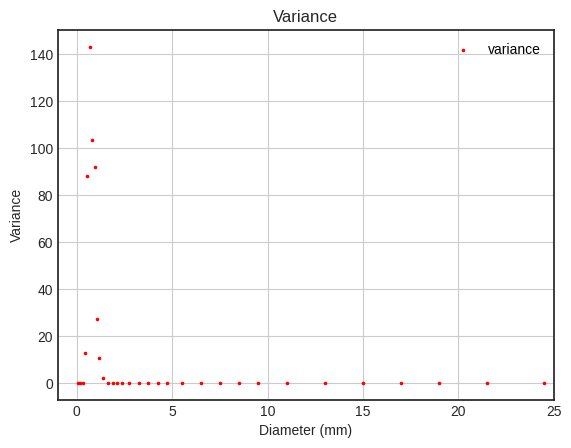

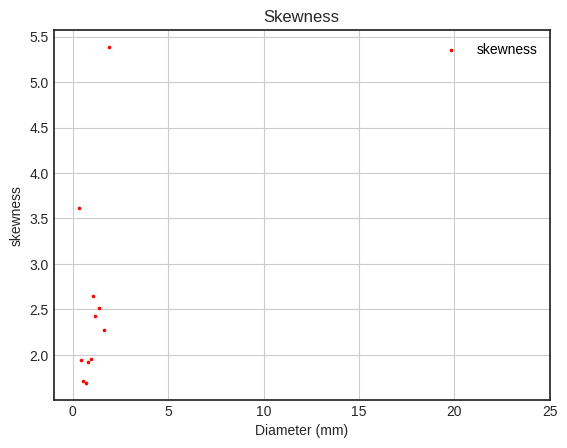

time period =  2022-10-29 16:00:00+08:00  -  2022-10-30 16:00:00+08:00
mse =  7.0687261516004165
rmse =  2.6587076092719215


In [55]:
from scipy.stats import skew

drop_speed = wt_mat.flatten()

x = np.linspace(0, 25, 25)
y = 9.65 - 10.43 * np.exp(-0.6 * x)
y1 = 9.65 - 10.43 * np.exp(-0.6 * diameter_class[:][1])

plt.style.use("seaborn-v0_8-white")


# add parsivel data
parsivel = plt.scatter(
    drop["diameter"],
    drop["velocity"],
    color="deepskyblue",
    marker=".",
    s=1,
    label="Parsivel",
    alpha=1,
)
#parsivel_mean = plt.scatter(
    #diameter_class, drop_speed, color="black", marker="x", s=20, label="Parsivel_mean"
#)
# add theoretical DSD curve
theoretical = plt.plot(x, y, label="theoretical", color="red", linestyle="dotted")

plt.legend(labelcolor="black")
plt.title("DSD")
plt.xlabel("Diameter (mm)")
plt.ylabel("Velocity (m/s)")
plt.grid(True)
plt.xlim(-1, 25)
plt.show()

# add variance
var = np.var(mat, axis=0)
variance = plt.scatter(
    diameter_class, var, color="red", marker=".", s=10, label="variance"
)

plt.legend(labelcolor="black")
plt.title("Variance")
plt.xlabel("Diameter (mm)")
plt.ylabel("Variance")
plt.grid(True)
plt.xlim(-1, 25)
plt.show()

# add skewness
skew = skew(mat, axis=0)
skewness = plt.scatter(
    diameter_class, skew, color="red", marker=".", s=10, label="skewness"
)

plt.legend(labelcolor="black")
plt.title("Skewness")
plt.xlabel("Diameter (mm)")
plt.ylabel("skewness")
plt.grid(True)
plt.xlim(-1, 25)
plt.show()


def mse(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.square(np.subtract(actual, pred)).mean()


def rmse(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.sqrt(np.square(np.subtract(actual, pred)).mean())


print("time period = ", start_time, " - ", end_time)
print("mse = ", mse(y1, drop["velocity"]))
print("rmse = ", rmse(y1, drop["velocity"]))

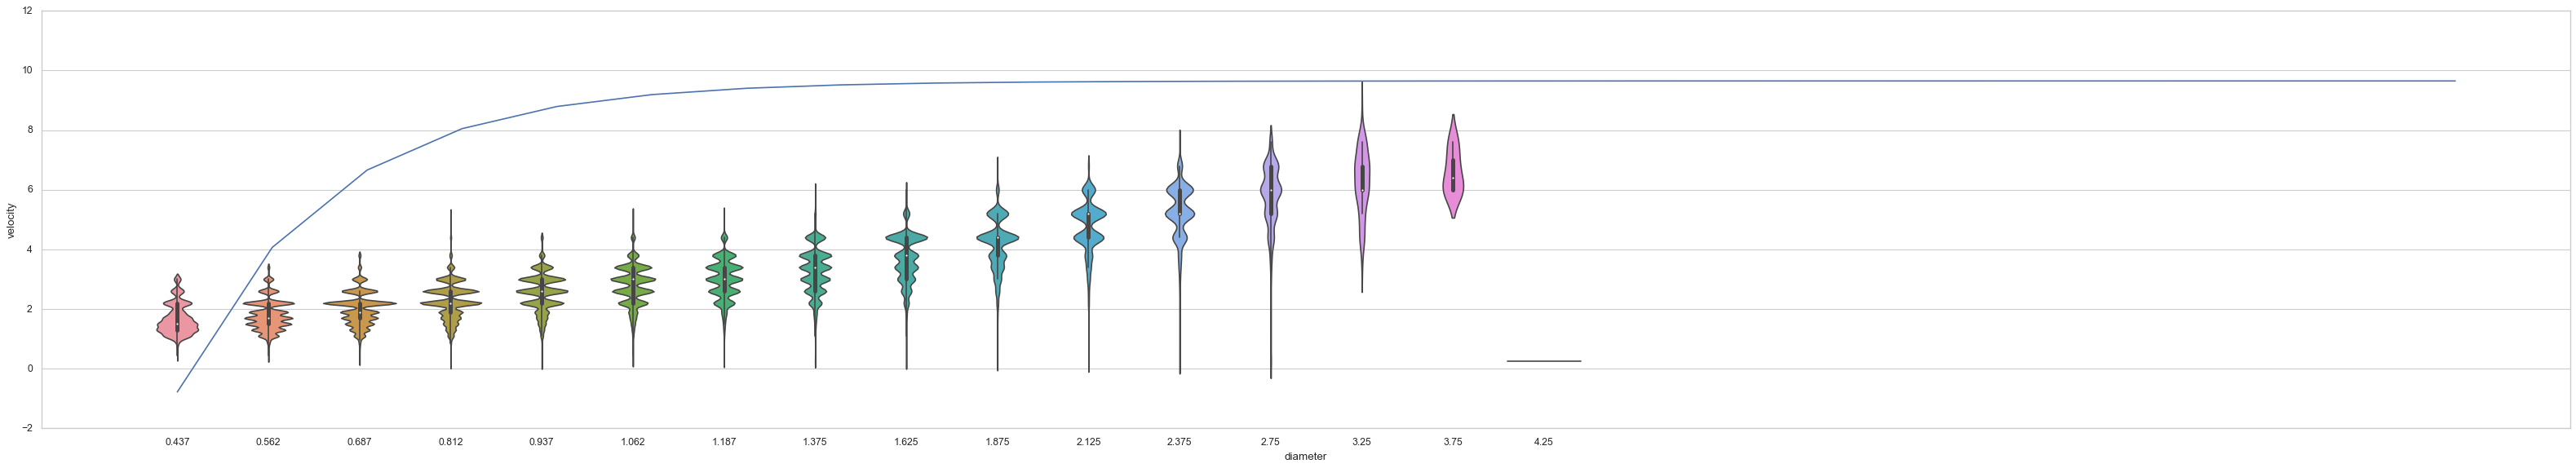

In [ ]:
# violinplot
sns.set(rc={"figure.figsize": (50, 8)})
sns.set_style("whitegrid")
sns.violinplot(x=drop["diameter"], y=drop["velocity"])
theoretical2 = sns.lineplot(x=x, y=y)